# Decision Trees and Random Forests in Python


**Learning Objectives**


1. Explore and analyze data using a Pairplot
2. Train a single Decision Tree
3. Predict and evaluate the Decision Tree
4. Compare the Decision Tree model to a Random Forest


## Introduction 

In this lab, you explore and analyze data using a Pairplot, train a single Decision Tree, predict and evaluate the Decision Tree, and compare the Decision Tree model to a Random Forest.  Recall that the [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving both regression and classification problems too.  Simply, the goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

Each learning objective will correspond to a __#TODO__ in the [student lab notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/labs/decision_trees_and_random_Forests_in_Python.ipynb) -- try to complete that notebook first before reviewing this solution notebook.

## Load necessary libraries 
We will start by importing the necessary libraries for this lab.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Get the Data

In [3]:
df = pd.read_csv("../kyphosis.csv")

In [4]:
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


## Exploratory Data Analysis

We'll just check out a simple pairplot for this small dataset.

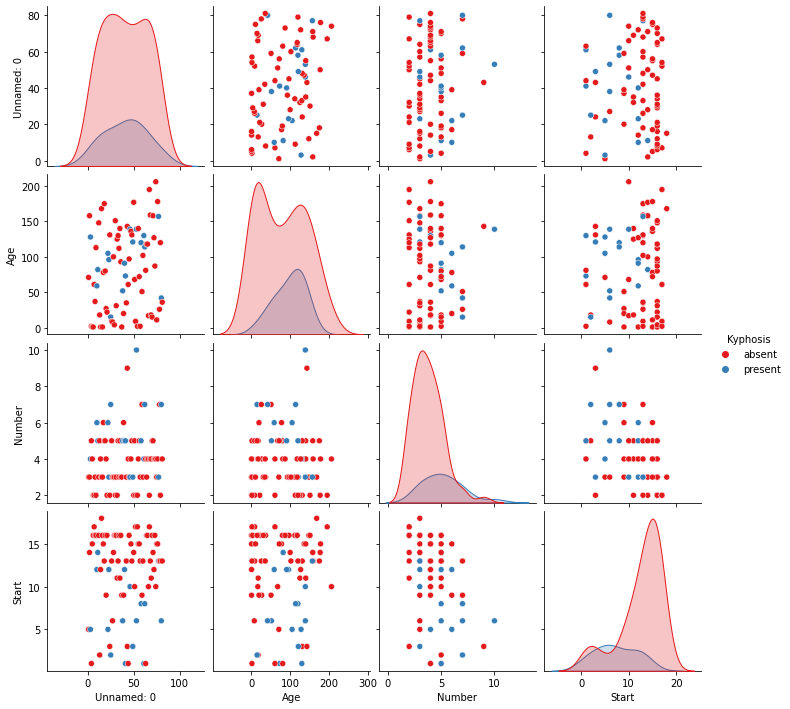

In [5]:
# TODO 1
sns.pairplot(df, hue="Kyphosis", palette="Set1")

## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
# TODO 2
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# TODO 3a
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.75      0.83      0.79        18
     present       0.40      0.29      0.33         7

    accuracy                           0.68        25
   macro avg       0.57      0.56      0.56        25
weighted avg       0.65      0.68      0.66        25



In [15]:
# TODO 3b
print(confusion_matrix(y_test, predictions))

[[15  3]
 [ 5  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [16]:
from io import StringIO

import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

features = list(df.columns[1:])
features

['Kyphosis', 'Age', 'Number', 'Start']

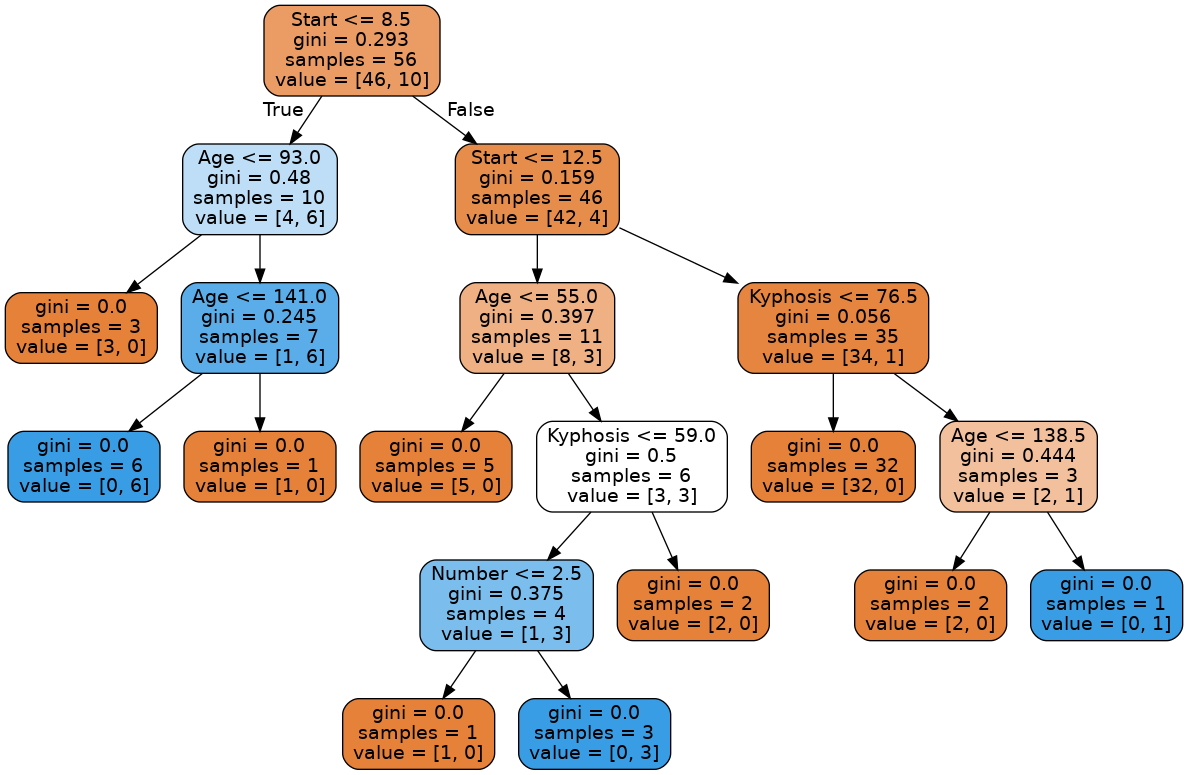

In [17]:
dot_data = StringIO()
export_graphviz(
    dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True
)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forests

Now let's compare the decision tree model to a random forest.

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
# TODO 4a
print(confusion_matrix(y_test, rfc_pred))

[[17  1]
 [ 6  1]]


In [21]:
# TODO 4b
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      0.94      0.83        18
     present       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25



Copyright 2021 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.